# Project: Investigate IMDb Movie Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling and Cleaning</a></li>
<li><a href="#eda">Exploring the Data</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

>In this project we will be investigating a movies dataset from IMDb, first we will wrangle and clean the data, then we are going to pose few qustions regarding the rating of the movies and their popualrity, and some other qustions, and finally we will draw some conclusions and insights from tha data.

>The dataset has over 10,000 movies collected from TMDb, the data set includes a varity of helpful information, such as the budget of the movie, the revenue, the genres, the production country and company, and many other useful information.

>The fowlling qustions could be explored from this data:
<ul>
<li><a>Is there a correlation between the of the rating movie and the popualarity?</a></li>
<li><a>Average runtime and average rating?</a></li>
<li><a>What is the most popular movie in the dataset?</a></li>
<li><a>Comedy genre vs Action genre?</a></li>
<li><a>Is there a correlation between the rating of the movie and the budget or revenue?</a></li>
</ul>

>This function will be used to plot the data later:

In [7]:
##importing the needed packges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [38]:
#this function is used to add labels and title to the plot, and to set it to grid or not
def insert_labels_title(xlabel, ylabel, title, grid, legends):
    if(legends):
        plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.grid(grid)

<a id='wrangling'></a>
## Data Wrangling and Cleaning






>load and inspect the data:

In [9]:
movies_data = pd.read_csv('tmdb-movies.csv')
movies_data.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [10]:
movies_data.shape

(10866, 21)

>We now know that the data of the movies has 21 columns and 10866 rows.
now let us inspect the data more using .dsecribe():

In [11]:
movies_data.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


>Now we need to check for null values in our dataset using .info():

In [12]:
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

>We can see that the hompage column, the tagline column, imdb_id column, the cast column, the dirctor column, keywords column, genres column, and production_companies column are all missing some values, in addition to some columns that are also missing 1 or 2 values.

>Now we will drop unnecessary columns using .drop():

In [13]:
movies_data.drop(['tagline','id','homepage','keywords','overview','imdb_id'],axis=1, inplace = True)
movies_data.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


>We will fill the null cells with the mean of the respictive column(for int data_type columns at least). which is not ideal, but it is a simple quick sloution:

In [14]:
movies_data.fillna(movies_data.mean,inplace=True)
movies_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10866 non-null  object 
 5   director              10866 non-null  object 
 6   runtime               10866 non-null  int64  
 7   genres                10866 non-null  object 
 8   production_companies  10866 non-null  object 
 9   release_date          10866 non-null  object 
 10  vote_count            10866 non-null  int64  
 11  vote_average          10866 non-null  float64
 12  release_year          10866 non-null  int64  
 13  budget_adj            10866 non-null  float64
 14  revenue_adj           10866 non-null  float64
dtypes: float64(4), int6

>We will make the revenue and budget columns more readable by represnteing them in millions unit:

In [15]:
movies_data['budget']=(movies_data['budget']/100000)
movies_data['revenue']=(movies_data['budget']/100000)
movies_data.head(20)

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1500.00000,0.0150,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,1500.00000,0.0150,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1100.00000,0.0110,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,11.173104,2000.00000,0.0200,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1900.00000,0.0190,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,1350.00000,0.0135,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08
6,8.654359,1550.00000,0.0155,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08
7,7.667400,1080.00000,0.0108,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
8,7.404165,740.00000,0.0074,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,1750.00000,0.0175,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08


>Here we going to exlude some movies with very low vote count, this will help to get a more accurate data:

In [16]:
movies_data = movies_data[movies_data['vote_count']>10]
movies_data.shape

(10365, 15)

>We will plot a histogram of the data to gain a general idea about the data:

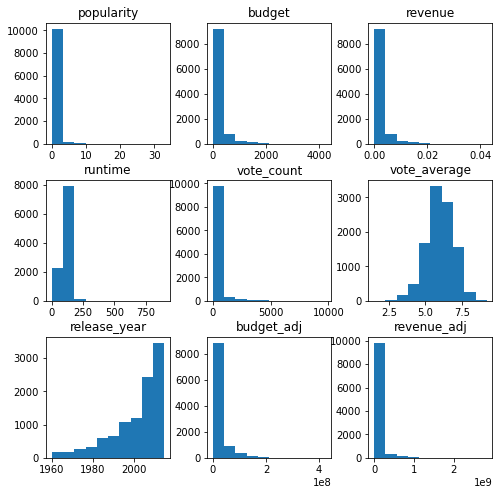

In [17]:
movies_data.hist(figsize=(8,8),grid=False);

<a id='eda'></a>
## Exploring the Data


### Q) Is there a correlation between the rating of the movie and the budget or revenue?

>we will separate our data into three dataframes, low rating movies(rating < 4.5), medium rating movies(4.5<= rating < 7.5), and high rating movies(rating >=7.5):

In [18]:
low_rating=movies_data[movies_data['vote_average'] < 4.5]
low_rating.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
61,2.487042,1200.00001,0.0120,Fantastic Four,Miles Teller|Kate Mara|Michael B. Jordan|Jamie...,Josh Trank,100,Action|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Marv Fi...,8/5/15,1565,4.4,2015,1.104000e+08,1.545393e+08
93,1.872696,100.00000,0.0010,Vice,Ambyr Childers|Thomas Jane|Bryan Greenberg|Bru...,Brian A Miller,96,Thriller|Science Fiction|Action|Adventure,Grindstone Entertainment Group|K5 Internationa...,1/16/15,181,4.1,2015,9.199996e+06,0.000000e+00
102,1.651078,40.00000,0.0004,The Boy Next Door,Jennifer Lopez|Ryan Guzman|Ian Nelson|John Cor...,Rob Cohen,91,Thriller,Universal Pictures|Nuyorican Productions|Blumh...,1/23/15,810,3.9,2015,3.679998e+06,4.615003e+07
173,0.872149,0.00000,0.0000,Extraction,Bruce Willis|Gina Carano|Kellan Lutz|D. B. Swe...,Steven C. Miller,83,Action|Thriller,Emmett/Furla Films|Oasis Films|Aperture Entert...,12/18/15,57,4.2,2015,0.000000e+00,1.543299e+04
184,0.813893,260.00000,0.0026,Accidental Love,Jake Gyllenhaal|Jessica Biel|James Marsden|Cat...,David O. Russell|Stephen Greene,100,Romance|Comedy,K. JAM Media,2/10/15,64,3.6,2015,2.391999e+07,0.000000e+00


In [19]:
low_rating.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,576.000000,5.760000e+02,5.760000e+02
mean,0.356319,66.878542,0.000669,92.500000,40.079861,3.904514,2006.194444,8.020217e+06,6.083521e+06
std,0.335380,172.312113,0.001723,13.327448,93.812768,0.505635,9.367309,2.100236e+07,2.556328e+07
min,0.001423,0.000000,0.000000,0.000000,11.000000,1.500000,1965.000000,0.000000e+00,0.000000e+00
25%,0.158479,0.000000,0.000000,87.000000,13.000000,3.600000,2002.000000,0.000000e+00,0.000000e+00
50%,0.278376,0.000000,0.000000,91.000000,18.000000,4.100000,2009.500000,0.000000e+00,0.000000e+00
75%,0.414291,50.000000,0.000500,96.250000,31.000000,4.300000,2013.000000,4.748721e+06,0.000000e+00
max,2.604799,1600.000000,0.016000,176.000000,1565.000000,4.400000,2015.000000,2.173537e+08,3.235949e+08


In [20]:
dataframe = movies_data[movies_data['vote_average'] >= 4.5]
med_rating = dataframe[dataframe['vote_average'] <7.5]
med_rating.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1500.0,0.0150,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,1500.0,0.0150,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,13.112507,1100.0,0.0110,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
4,9.335014,1900.0,0.0190,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
5,9.110700,1350.0,0.0135,The Revenant,Leonardo DiCaprio|Tom Hardy|Will Poulter|Domhn...,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,156,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,12/25/15,3929,7.2,2015,1.241999e+08,4.903142e+08


In [21]:
med_rating.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,9336.000000,9336.000000,9336.000000,9336.00000,9336.000000,9336.000000,9336.000000,9.336000e+03,9.336000e+03
mean,0.646514,157.018916,0.001570,102.31973,208.317374,6.036568,2001.089867,1.881605e+07,5.304362e+07
std,0.904225,316.275450,0.003163,28.07235,504.336924,0.709553,12.765193,3.516858e+07,1.397025e+08
min,0.000065,0.000000,0.000000,0.00000,11.000000,4.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.225678,0.000000,0.000000,90.00000,19.000000,5.500000,1994.000000,0.000000e+00,0.000000e+00
50%,0.411941,0.000000,0.000000,100.00000,44.000000,6.100000,2005.000000,0.000000e+00,0.000000e+00
75%,0.746288,180.000000,0.001800,112.00000,162.000000,6.600000,2011.000000,2.374361e+07,4.044034e+07
max,32.985763,4250.000000,0.042500,877.00000,8903.000000,7.400000,2015.000000,4.250000e+08,2.827124e+09


In [22]:
high_rating = movies_data[movies_data['vote_average'] >= 7.5 ]
high_rating.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
3,11.173104,2000.0,0.0200,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
7,7.667400,1080.0,0.0108,The Martian,Matt Damon|Jessica Chastain|Kristen Wiig|Jeff ...,Ridley Scott,141,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,9/30/15,4572,7.6,2015,9.935996e+07,5.477497e+08
9,6.326804,1750.0,0.0175,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
12,6.118847,150.0,0.0015,Ex Machina,Domhnall Gleeson|Alicia Vikander|Oscar Isaac|S...,Alex Garland,108,Drama|Science Fiction,DNA Films|Universal Pictures International (UP...,1/21/15,2854,7.6,2015,1.379999e+07,3.391985e+07
27,4.503789,810.0,0.0081,Kingsman: The Secret Service,Taron Egerton|Colin Firth|Samuel L. Jackson|Mi...,Matthew Vaughn,130,Crime|Comedy|Action|Adventure,Twentieth Century Fox Film Corporation|Marv Fi...,1/24/15,3833,7.6,2015,7.451997e+07,3.714978e+08


In [23]:
high_rating.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,453.000000,4.530000e+02,4.530000e+02
mean,1.504895,172.285589,0.001723,111.671082,859.183223,7.755188,2002.933775,2.060024e+07,1.287117e+08
std,2.432336,400.953735,0.004010,76.184249,1482.563021,0.265245,13.615128,4.096832e+07,2.953211e+08
min,0.001315,0.000000,0.000000,0.000000,11.000000,7.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.171378,0.000000,0.000000,88.000000,23.000000,7.500000,1997.000000,0.000000e+00,0.000000e+00
50%,0.407520,0.000000,0.000000,105.000000,98.000000,7.700000,2009.000000,0.000000e+00,0.000000e+00
75%,2.042620,150.000000,0.001500,130.000000,1100.000000,7.900000,2013.000000,2.259642e+07,1.040201e+08
max,24.949134,2500.000000,0.025000,900.000000,9767.000000,9.200000,2015.000000,2.374361e+08,2.789712e+09


In [24]:
(high_rating['budget'].mean() , med_rating['budget'].mean() , low_rating['budget'].mean())

(172.28558929359824, 157.01891584297348, 66.87854213541667)

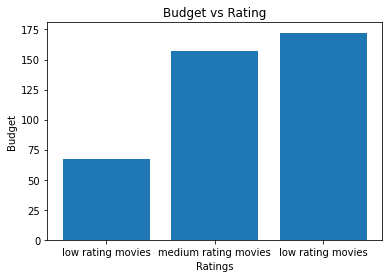

In [41]:
plt.bar([1, 2, 3], [low_rating['budget'].mean(), med_rating['budget'].mean(), high_rating['budget'].mean()])
plt.xticks([1, 2, 3], ['low rating movies', 'medium rating movies', 'low rating movies']);
insert_labels_title('Ratings','Budget','Budget vs Rating',False,False)

>We see that the budget mean of medium rating movies is higher than the budget mean of low rating movies, by almost 90 million diffrence, but high rating movies budget mean is slightly greater than medium rating budget.

>We will plot the budget against the rating to the to check the correlation:

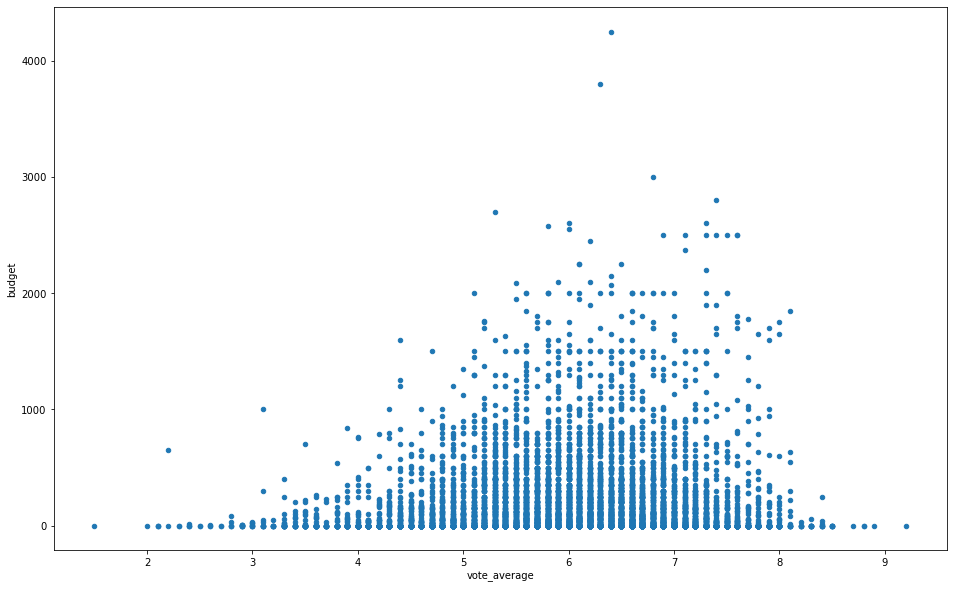

In [26]:
movies_data.plot(x='vote_average',y='budget',kind='scatter',figsize=(16,10));

>From the above sctter diagram we can see that most of the low rating movies has a very low budget,
whereas most medium rating movies haave a way higher budget than low rating movies,
which shows that there is a correlation between the budget and the rating of the movie.

### Q) Is there a correlation between the of the rating movie and the popualarity?

>We want to see if the popualarity affect the rating of the movie or not?


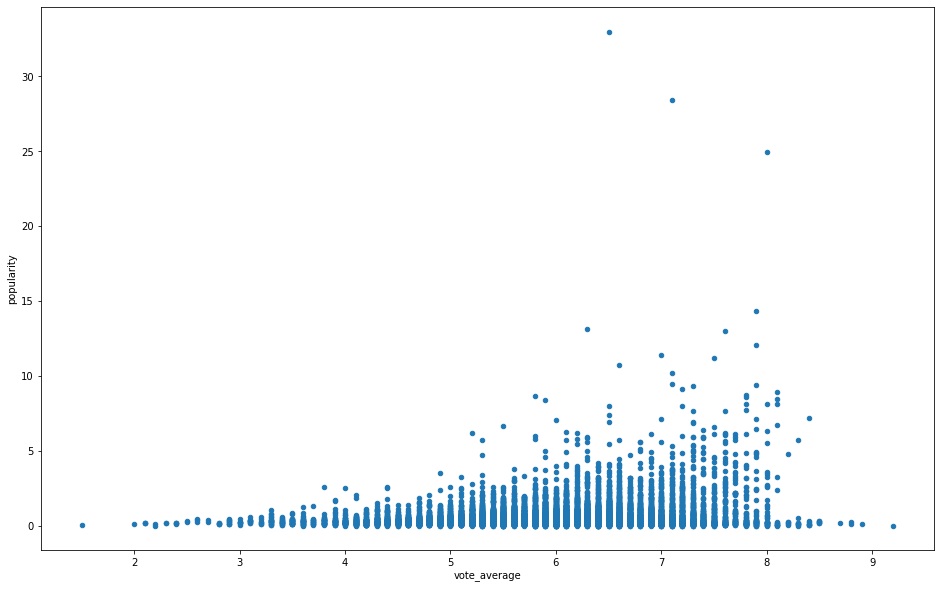

In [27]:
movies_data.plot(x='vote_average',y='popularity',kind='scatter', figsize=(16,10));

>Here we can see that there is a small trend that the higher the vote_average the higher the popularity, but that trend is weak with ratings greater than 8.

### Q) Average runtime and average rating?

In [28]:
movies_data['runtime'].mean(), movies_data['vote_average'].mean()

(102.1827303424988, 5.993198263386423)

>From the above result we can see that most movies are alomst 1.7 hours long(from the mean of runtime), and we can conclude that 6 is the most common rating for movies in general, which makes sense.

### Q) Comedy genre vs Action genre?

>We will separate the dataset into two dataframes, comedy and action:

In [29]:
comedy= movies_data[movies_data['genres'].str.contains('Comedy',na=False)]
comedy.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
8,7.404165,740.0,0.0074,Minions,Sandra Bullock|Jon Hamm|Michael Keaton|Allison...,Kyle Balda|Pierre Coffin,91,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6/17/15,2893,6.5,2015,6.807997e+07,1.064192e+09
9,6.326804,1750.0,0.0175,Inside Out,Amy Poehler|Phyllis Smith|Richard Kind|Bill Ha...,Pete Docter,94,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,6/9/15,3935,8.0,2015,1.609999e+08,7.854116e+08
13,5.984995,880.0,0.0088,Pixels,Adam Sandler|Michelle Monaghan|Peter Dinklage|...,Chris Columbus,105,Action|Comedy|Science Fiction,Columbia Pictures|Happy Madison Productions,7/16/15,1575,5.8,2015,8.095996e+07,2.241460e+08
24,4.648046,280.0,0.0028,The Big Short,Christian Bale|Steve Carell|Ryan Gosling|Brad ...,Adam McKay,130,Comedy|Drama,Paramount Pictures|Plan B Entertainment|Regenc...,12/11/15,1545,7.3,2015,2.575999e+07,1.226787e+08
26,4.564549,680.0,0.0068,Ted 2,Mark Wahlberg|Seth MacFarlane|Amanda Seyfried|...,Seth MacFarlane,115,Comedy,Universal Pictures|Media Rights Capital|Fuzzy ...,6/25/15,1666,6.3,2015,6.255997e+07,1.985944e+08


In [30]:
comedy.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3617.000000,3.617000e+03,3.617000e+03
mean,0.611550,138.735120,0.001387,96.839093,184.534974,5.915593,2000.983688,1.658033e+07,5.002947e+07
std,0.690809,263.130305,0.002631,20.263491,407.373805,0.834887,11.836717,2.968891e+07,1.162777e+08
min,0.000620,0.000000,0.000000,0.000000,11.000000,2.100000,1960.000000,0.000000e+00,0.000000e+00
25%,0.224130,0.000000,0.000000,90.000000,20.000000,5.400000,1994.000000,0.000000e+00,0.000000e+00
50%,0.410616,0.000000,0.000000,96.000000,46.000000,5.900000,2004.000000,0.000000e+00,0.000000e+00
75%,0.738153,180.000000,0.001800,106.000000,161.000000,6.500000,2010.000000,2.246547e+07,4.435889e+07
max,8.691294,2250.000000,0.022500,417.000000,4856.000000,8.500000,2015.000000,2.225390e+08,1.574815e+09


In [31]:
action= movies_data[movies_data['genres'].str.contains('Action',na=False)]
action.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,1500.0,0.0150,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,1500.0,0.0150,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
3,11.173104,2000.0,0.0200,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,9.335014,1900.0,0.0190,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09
6,8.654359,1550.0,0.0155,Terminator Genisys,Arnold Schwarzenegger|Jason Clarke|Emilia Clar...,Alan Taylor,125,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,6/23/15,2598,5.8,2015,1.425999e+08,4.053551e+08


In [32]:
action.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2309.000000,2.309000e+03,2.309000e+03
mean,0.948254,285.639340,0.002856,105.082720,405.477263,5.808878,2000.239498,3.388063e+07,9.466926e+07
std,1.553889,463.381407,0.004634,28.918978,917.334890,0.930214,12.731165,4.990302e+07,2.095014e+08
min,0.001662,0.000000,0.000000,0.000000,11.000000,2.000000,1960.000000,0.000000e+00,0.000000e+00
25%,0.272562,0.000000,0.000000,93.000000,21.000000,5.300000,1993.000000,0.000000e+00,0.000000e+00
50%,0.485288,70.000000,0.000700,101.000000,60.000000,5.900000,2004.000000,9.693980e+06,2.450545e+06
75%,1.031011,390.000000,0.003900,115.000000,289.000000,6.400000,2010.000000,5.024535e+07,8.990674e+07
max,32.985763,4250.000000,0.042500,705.000000,9767.000000,8.100000,2015.000000,4.250000e+08,2.827124e+09


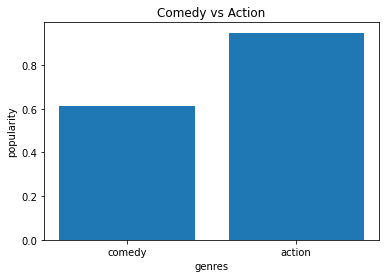

In [39]:
plt.bar([1, 2,], [ comedy['popularity'].mean(), action['popularity'].mean()])
plt.xticks([1, 2], [ 'comedy', 'action']);
insert_labels_title('genres','popularity','Comedy vs Action',False,False)

>Looks like Action movies are more popular

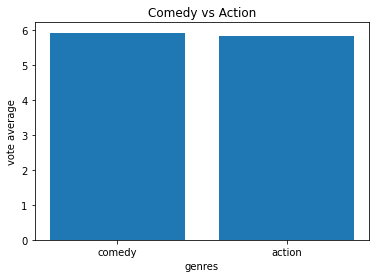

In [40]:
plt.bar([1, 2,], [ comedy['vote_average'].mean(), action['vote_average'].mean()])
plt.xticks([1, 2], [ 'comedy', 'action']);
insert_labels_title('genres','vote average','Comedy vs Action',False,False)

>The genres have almost similar average scores, which is surprising. 

### Q) What is the most popular movie in the dataset?

In [37]:
print(movies_data[movies_data['popularity']==32.985763]['original_title']);

0    Jurassic World
Name: original_title, dtype: object


>Jurassic World is the most popular in the dataset! no wonder, a great movie. 

<a id='conclusions'></a>
## Conclusions

>There is corrlation between the rating of the movie and the budget spent on the movie, but that corrlation is waeker when it comes to high rating vs good rating, which I think makes sense that spending more money in a movie does not mean necessarily the move will be better.

>There is corrlation between the rating of the movie and the popularity the movie has, the grapgh was a little left-skewd, but the the higher the rating the less the corrlation becomes.

>6 is the expected rating for a movie, and most movies are 1.7 hours long.

>Movies with Action genre tend to have more popularity over Comedy movies.

>We found out that Jurassic World is the most popular in the dataset, which is no surprise.

### Limitiations for the dataset

>The dataset was limited in terms of the information about the cast, for example you don't know who has the main role in the film and the gender of the cast.

>There was no clear categorical values, like gender or class, this made plotting the data harder.

>There is no normalization or exchange rate or currency conversion is considered during this analysis and our analysis is limited to the numerical values of revenue.

>The null values was replaced with the mean of the coulmns for numerical coulmns, and null values for non-numerical coulmns was dropped, which is not ideal and could affect thr dataset adversely. 